![](mlb-logo.png){fig-align="center"}

# **Part I: Different Model Specs**

**Data cleaning, preparation, manipulation**

In [364]:
# Importing the dataset
import pandas as pd

df_hitters = pd.read_csv('/content/drive/My Drive/Hitters.csv')
df_hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [365]:
# Checking for NA values
na_values = df_hitters.isna().sum()

print(na_values[na_values > 0])

Salary    59
dtype: int64


*Dealing with the 59 missing salary values was necessary and simply removing those rows from the dataset with 322 rows would be a substantial loss of data. The method of imputing the missing salary with the average salary of players who have played the same amount of years was implemented.*

In [366]:
# Calculating the average salary after grouping by 'Years'
average_salaries = df_hitters.groupby('Years')['Salary'].mean()

# Defining the function to impute missing salary
def impute_salary(row):
    if pd.isna(row['Salary']):
        return average_salaries[row['Years']]
    else:
        return row['Salary']

# Applying the function to the DataFrame
df_hitters['Salary'] = df_hitters.apply(impute_salary, axis=1)

In [367]:
# Checking for NA values again
na_values = df_hitters.isna().sum()

print(na_values[na_values > 0])

Salary    1
dtype: int64


In [368]:
# Finding rows where 'Salary' is missing
missing_salary_rows = df_hitters[df_hitters['Salary'].isna()]

print(missing_salary_rows)

     AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
302    200    51      2    14   29     25     23    9778   2732     379   

     CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary  \
302   1272  1652     925      N        W      398       29       7     NaN   

    NewLeague  
302         N  


*It was found that row 302 could not find a match for 23 years played, so the salary of the player who played 24 years was imputed instead.*

In [369]:
# Calculating the average salary for players who played 24 years
avg_salary_24_years = df_hitters[df_hitters['Years'] == 24]['Salary'].mean()

# Defining the function to impute missing salary
def impute_salary(row):
    if pd.isna(row['Salary']):
        if row['Years'] == 23:
            return avg_salary_24_years
        else:
            return average_salaries[row['Years']]
    else:
        return row['Salary']

# Applying the function to the dataframe
df_hitters['Salary'] = df_hitters.apply(impute_salary, axis=1)

In [370]:
# Checking for NA values a final time
na_values = df_hitters.isna().sum()

print(na_values[na_values > 0])

Series([], dtype: int64)


In [371]:
# Rounding the 'Salary' column to 2 decimal places
df_hitters['Salary'] = df_hitters['Salary'].round(2)

*Being from the East or West by itself is not meaningful, because there are two separate leagues, the American and National League. Being from the American League East or National League West has more significance than these variables by themselves, because teams from the same division play each other more frequently than out of division. They will be combined and a new column will be created with AL East(AE) & AL West(AW), and NL East(NE) & NL West(NW) as values. The NewLeague variable only designates if the player changed leagues, and there are only 2 leauges. It will be changed to a value of 0 if unchanged, and 1 if changed.*

In [372]:
# Replacing 'NewLeague' column based on the condition
df_hitters['NewLeague'] = df_hitters.apply(lambda row: 0 if row['League'] == row['NewLeague'] else 1, axis=1)

# Replacing 'Division' column with the combination of 'League' and 'Division'
df_hitters['Division'] = df_hitters['League'] + df_hitters['Division']

# Dropping the 'League' column from the dataframe
df_hitters.drop('League', axis=1, inplace=True)

In [373]:
df_hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,AE,446,33,20,149.65,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,NW,632,43,10,475.00,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,AW,880,82,14,480.00,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,NE,200,11,3,500.00,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,NE,805,40,4,91.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,NE,325,9,3,700.00,0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,AE,313,381,20,875.00,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,AW,37,113,7,385.00,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,AE,1314,131,12,960.00,0


Now there are 19 total variables, 18 predictor and 1 response variable.

In [374]:
# Saving the final imputed dataframe to google drive
df_hitters.to_csv('/content/drive/My Drive/Hitters_imputed.csv', index=False)

In [375]:
# Displaying summary statistics of the cleaned dataset
df_hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NewLeague
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,533.363292,0.059006
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,421.770988,0.236003
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000,0.000000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,200.000000,0.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,450.000000,0.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,740.000000,0.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000,1.000000


**A. Regression without regularization**

1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary linear regression

2. Fit this pipeline to the full dataset, and interpret a few of the most important coefficients.

3. Use cross-validation to estimate the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [376]:
# Removing ConvergenceWarning from the script
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter('ignore', ConvergenceWarning)

In [377]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Creating response and predictor variables
X = df_hitters.drop('Salary', axis=1)
y = df_hitters['Salary']

# Splitting into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initializing the column transformer
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

# Linear Regression pipeline
lr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("linear_regression", LinearRegression())]
)

# Performing cross-validation for R-squared
linear_scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='r2')
print("Linear R-squared Scores")
print(linear_scores)
print()

# Performing cross-validation for MSE
mse_scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE Scores:")
print(-(mse_scores))
print()

# Fitting the model on the whole dataset
lr_pipeline.fit(X, y)

# Getting the coefficients
linear_coefs = lr_pipeline.named_steps['linear_regression'].coef_

# Extracting feature names
feature_names = (lr_pipeline.named_steps['preprocessing']
                 .transformers_[0][1]
                 .get_feature_names_out(input_features=X.select_dtypes(include=[object]).columns.tolist())
                 .tolist() +
                 X.select_dtypes(include=[np.number]).columns.tolist())

# Pairing coefficients with feature names
coefs_with_names = list(zip(feature_names, linear_coefs))

# Sorting the coefficients by their absolute values
sorted_coefs = sorted(coefs_with_names, key=lambda x: abs(x[1]), reverse=True)

# Displaying the most significant coefficients
print("Most significant coefficients:")
for feature, coef in sorted_coefs[:10]:
    print(f"{feature}: {coef}")

Linear R-squared Scores
[0.25463432 0.48056499 0.60265313 0.10502763 0.24692124]

MSE Scores:
[ 73024.19366678 133188.55515943  82292.61375738 152156.47463451
 100478.59005571]

Most significant coefficients:
CRuns: 525.0639898710302
Hits: 320.8711259450601
AtBat: -308.0127179888107
CAtBat: -293.20297845665795
CRBI: 267.1079382969071
CWalks: -184.82277273642984
Walks: 115.83759639020934
Division_AW: -93.48166065075378
CHits: -88.0542497265344
Division_NW: -85.36380924046293


*    Career runs had the largest coefficient of 525.06, and this isn't a surprise as scoring runs over the length of a player's career is directly related to the success of their team, and in turn, their salary.
*    1986 Regular season hits was 2nd with a coefficient of 320.87, and this was also not a surprise as getting on base is a pre-cursor to scoring runs as described above, and is directly related to producing runs.
*    Atbat and CAtBat were 3rd and 4th and were negative coefficients, which was a little surprising as coming up to bat indicates how durable a player is as well as how well the team's offense was able to bat around the lineup in a single game. More at-bats indicates more players had reached base, which is directly related with scoring runs.
*    Career RBI was 5th with a value of 267.11 and this was expected, as RBI are an indicator of how many runs were being produced directly by a player's bat.
*    I was expecting the most significant coefficients to be career statistics, such as runs, hits, rbi's and hr's. It was interesting to see that the most recent completed season's hits were 2nd in significance, and that career homeruns didn't make the top 10.
*    8 of the top 10 significant coefficients were all related to hitting statistics, which was surprising, as traditionally, defense is also factored in when considering a player's salary.
*    It was surprising to see that being in a certain League's Division had an impact on the coefficient's strength.
*    There were some notable omissions of statistical categories, such as batting avg, on-base percentage, fielding percentage as well as wins above replacement, slugging percentage, on-base + slugging (OPS), as well as some other secondary metrics. This is probably because the year this data was collected was 1986, and advanced statistics, a la Bill James, was not utilized by baseball at that time.

In [378]:
# Reporting the Linear Model's mean MSE for future predictions (1989)
mse_scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
average_mse = -np.mean(mse_scores)
print("Linear Model's Average MSE:", average_mse)

Linear Model's Average MSE: 108228.08545476268


**B. Ridge regression**

1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

2. Use cross-validation to **tune** the $\lambda$ hyperparameter.

3. Fit the pipeline with your chosen $\lambda$ to the full dataset, and interpret a few of the most important coefficients.

4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [379]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Ridge Regression pipeline
ridge_pipeline = Pipeline(
    [("preprocessing", ct),
     ("ridge_regression", Ridge(alpha=1))]  # lambda=alpha
    ).set_output(transform="pandas")

# Fitting the model on the whole dataset
ridge_pipeline.fit(X, y)

alphas = {'ridge_regression__alpha': [0.001, 0.01, 0.1, 1, 10]}

gscv1 = GridSearchCV(ridge_pipeline, alphas, cv = 5, scoring='neg_mean_squared_error')

gscv1_fitted = gscv1.fit(X, y)

positive_mse_scores1 = -gscv1_fitted.cv_results_['mean_test_score']

pd.DataFrame(data = {"alphas": [0.001, 0.01, 0.1, 1, 10], "scores": positive_mse_scores1})

,alphas,scores
0,0.001,108215.714462
1,0.010,108108.481899
2,0.100,107327.827024
3,1.000,105582.987251
4,10.000,105970.781826


*    The $\lambda$ of 1.000 gave the lowest Ridge MSE score of 105582.99.

In [380]:
# Ridge Regression pipeline
ridge_pipeline = Pipeline(
    [("preprocessing", ct),
     ("ridge_regression", Ridge(alpha=1))]  # fitting with the tuned parameter of 1
    ).set_output(transform="pandas")

# Performing cross-validation for R2
ridge_scores = cross_val_score(ridge_pipeline, X, y, cv = 5, scoring = 'r2')
print("Ridge R-squared Scores")
print(ridge_scores)
print()

# Performing cross-validation for MSE
mse_scores1 = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE Scores:")
print(-(mse_scores1))
print()

# Fitting the model on the whole dataset
ridge_pipeline.fit(X, y)

# Getting the coefficients
ridge_coefs = ridge_pipeline.named_steps['ridge_regression'].coef_

# Extracting feature names
feature_names = (ridge_pipeline.named_steps['preprocessing']
                 .transformers_[0][1]
                 .get_feature_names_out(input_features=X.select_dtypes(include=[object]).columns.tolist())
                 .tolist() +
                 X.select_dtypes(include=[np.number]).columns.tolist())

# Pairing coefficients with feature names
coefs_with_names1 = list(zip(feature_names, ridge_coefs))

# Sorting the coefficients by their absolute values
sorted_coefs1 = sorted(coefs_with_names1, key=lambda x: abs(x[1]), reverse=True)

# Displaying the most significant coefficients
print("Most significant coefficients:")
for feature, coef in sorted_coefs1[:5]:
    print(f"{feature}: {coef}")

Ridge R-squared Scores
[0.27193427 0.47396499 0.60741922 0.13142073 0.30499687]

MSE Scores:
[ 71329.3006593  134880.86494311  81305.53081858 147669.3170587
  92729.92277658]

Most significant coefficients:
CRuns: 343.5605653372705
AtBat: -284.10395111638826
Hits: 273.12163657110233
CAtBat: -214.16491730350424
CWalks: -150.41335714113063


*    Career runs is again the most significant value with a value of 343.56.
*    The AtBat coefficent was the 2nd most significant with a value of -284.10, and this is different from the linear model's value of -308.01 outputted previously.
*    Hits, which were previously 1st, is now the 3nd most significant coefficient at 273.12.
*    Career at-bats is now -214.16 and was previously 4th at -293.20, and this is consistent with the linear model.
*    Career walks is 5th with a value of -150.41, when it was 6th in the linear model with -184.82.

In [381]:
# Reporting Ridge Model's mean MSE for future predictions (1989)
mse_scores1 = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
average_mse1 = -np.mean(mse_scores1)
print("Ridge Model's Average MSE:", average_mse1)

Ridge Model's Average MSE: 105582.98725125178


**C. LASSO Regression**

1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

2. Use cross-validation to **tune** the $\lambda$ hyperparameter.

3. Fit the pipeline with your chosen $\lambda$ to the full dataset, and interpret a few of the most important coefficients.

4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [382]:
from sklearn.linear_model import Lasso

# Lasso Regression pipeline
lasso_pipeline = Pipeline(
    [("preprocessing", ct),
     ("lasso_regression", Lasso(alpha=1))]
    ).set_output(transform="pandas")

# Fitting the model on the whole dataset
lasso_pipeline.fit(X, y)

alphas = {'lasso_regression__alpha': [0.001, 0.01, 0.1, 1, 10]}

gscv2 = GridSearchCV(lasso_pipeline, alphas, cv = 5, scoring='neg_mean_squared_error')

gscv2_fitted = gscv2.fit(X, y)

positive_mse_scores2 = -gscv2_fitted.cv_results_['mean_test_score']

pd.DataFrame(data = {"alphas": [0.001, 0.01, 0.1, 1, 10], "scores": positive_mse_scores2})

,alphas,scores
0,0.001,108048.014906
1,0.010,108009.150233
2,0.100,107643.679636
3,1.000,105354.061349
4,10.000,108940.966194


*    The $\lambda$ of 1.000 gave the lowest Lasso MSE score of 105354.06.

In [383]:
# Lasso Regression pipeline
lasso_pipeline = Pipeline(
    [("preprocessing", ct),
     ("lasso_regression", Lasso(alpha=1))]  # fitting with the tuned parameter of 1
    ).set_output(transform="pandas")

# Performing cross-validation for R2
lasso_scores = cross_val_score(lasso_pipeline, X, y, cv = 5, scoring = 'r2')
print("Lasso R-squared Scores")
print(lasso_scores)
print()

# Performing cross-validation for MSE
mse_scores2 = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE Scores:")
print(-(mse_scores2))
print()

# Fitting the model on the whole dataset
lasso_pipeline.fit(X, y)

# Getting the coefficients
lasso_coefs = lasso_pipeline.named_steps['lasso_regression'].coef_

# Extracting feature names
feature_names = (lasso_pipeline.named_steps['preprocessing']
                 .transformers_[0][1]
                 .get_feature_names_out(input_features=X.select_dtypes(include=[object]).columns.tolist())
                 .tolist() +
                 X.select_dtypes(include=[np.number]).columns.tolist())

# Pairing coefficients with feature names
coefs_with_names2 = list(zip(feature_names, lasso_coefs))

# Sorting the coefficients by their absolute values
sorted_coefs2 = sorted(coefs_with_names2, key=lambda x: abs(x[1]), reverse=True)

# Displaying the most significant coefficients
print("Most significant coefficients:")
for feature, coef in sorted_coefs2[:5]:
    print(f"{feature}: {coef}")

Lasso R-squared Scores
[0.29384431 0.4670927  0.60150738 0.13653703 0.3133518 ]

MSE Scores:
[ 69182.752576   136642.99105291  82529.90451596 146799.48222784
  91615.17637258]

Most significant coefficients:
CRuns: 340.7101115223394
AtBat: -285.79669831262163
Hits: 276.9281094736042
CWalks: -144.82508467517945
CAtBat: -136.88723499956404


*    Career runs are is the most significant coefficient with a value of 340.71, and this has been consistently the top coefficient across the 3 models so far.
*    AtBat is the 2nd most significant variable, and it has a negative value of -285.80. It being a negative coefficient and significant has been consistent across all the models so far.
*    Hits are the 3rd most significant with a value of 276.93.
*    Career walks are 4th with a value of -144.83 and career at-bats are 5th at -136.89.

In [384]:
# Reporting the Lasso Model's mean MSE for future predictions (1989)
mse_scores2 = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
average_mse2 = -np.mean(mse_scores2)
print("Lasso Model's Average MSE:", average_mse2)

Lasso Model's Average MSE: 105354.06134905752


**D. Elastic Net**

1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

2. Use cross-validation to **tune** the $\lambda$ and $\alpha$
hyperparameters.

3. Fit the pipeline with your chosen hyperparameters to the full dataset, and interpret a few of the most important coefficients.

4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [386]:
from sklearn.linear_model import ElasticNet

# Elastic Net Regression pipeline
elastic_net_pipeline = Pipeline(
    [("preprocessing", ct),
     ("elastic_net", ElasticNet(alpha=1))]
    ).set_output(transform="pandas")

alphas = {
    'elastic_net__alpha': [0.001, 0.01, 0.1, 1, 10],
    'elastic_net__l1_ratio': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]} # l1 ratio should be between 0(Ridge) and 1(Lasso)

gscv3 = GridSearchCV(elastic_net_pipeline, alphas, cv = 5, scoring='neg_mean_squared_error')

gscv3_fitted = gscv3.fit(X, y)

results = pd.DataFrame(gscv3_fitted.cv_results_)
positive_mse_scores3 = -gscv3_fitted.cv_results_['mean_test_score']

# Extracting only the parameters and the mean test score
df_elastic = results.loc[:, ['param_elastic_net__alpha', 'param_elastic_net__l1_ratio', 'mean_test_score']]
df_elastic['mean_test_score'] = -df_elastic['mean_test_score']

print(df_elastic)

   param_elastic_net__alpha param_elastic_net__l1_ratio  mean_test_score
0                     0.001                        0.01    106605.153266
1                     0.001                        0.05    106639.325710
2                     0.001                         0.1    106683.876285
3                     0.001                         0.3    106885.192877
4                     0.001                         0.5    107131.703682
5                     0.001                         0.7    107437.077897
6                     0.001                         0.9    107819.959645
7                     0.001                        0.95    107930.564982
8                     0.001                        0.99    108023.954131
9                      0.01                        0.01    105273.913203
10                     0.01                        0.05    105276.418633
11                     0.01                         0.1    105281.419446
12                     0.01                        

In [387]:
# Finding the row with the highest mean_test_score
best_row = results.loc[results['mean_test_score'].idxmax()]

# Extracting the best score and the corresponding parameters
best_score = best_row['mean_test_score']
best_params = best_row['params']

print(f"The best mean test score (MSE) is {-best_score}")
print(f"The best parameters are {best_params}")

The best mean test score (MSE) is 105244.84307589207
The best parameters are {'elastic_net__alpha': 1, 'elastic_net__l1_ratio': 0.99}


*    The $\lambda$ of 1 for Alpha and the $\alpha$ of 0.99 for L1 Ratio gave the lowest Elastic Net MSE score of 105244.84.

In [388]:
# Elastic Net Regression pipeline
elastic_net_pipeline = Pipeline(
    [("preprocessing", ct),
     ("elastic_net_regression", ElasticNet(alpha=1, l1_ratio=0.99))]  # fitting with the best tuned parameters
    ).set_output(transform="pandas")

# Performing cross-validation for R2
elastic_net_scores = cross_val_score(elastic_net_pipeline, X, y, cv = 5, scoring = 'r2')
print("Elastic Net R-squared Scores")
print(elastic_net_scores)
print()

# Performing cross-validation for MSE
mse_scores3 = cross_val_score(elastic_net_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE Scores:")
print(-(mse_scores3))
print()

# Fitting the model on the whole dataset
elastic_net_pipeline.fit(X, y)

# Getting the coefficients
elastic_net_coefs = elastic_net_pipeline.named_steps['elastic_net_regression'].coef_

# Extracting feature names
feature_names = (elastic_net_pipeline.named_steps['preprocessing']
                 .transformers_[0][1]
                 .get_feature_names_out(input_features=X.select_dtypes(include=[object]).columns.tolist())
                 .tolist() +
                 X.select_dtypes(include=[np.number]).columns.tolist())

# Pairing coefficients with feature names
coefs_with_names3 = list(zip(feature_names, elastic_net_coefs))

# Sorting the coefficients by their absolute values
sorted_coefs3 = sorted(coefs_with_names3, key=lambda x: abs(x[1]), reverse=True)

# Displaying the most significant coefficients
print("Most significant coefficients:")
for feature, coef in sorted_coefs3[:5]:
    print(f"{feature}: {coef}")

Elastic Net R-squared Scores
[0.30504842 0.44923547 0.59785854 0.13777363 0.34762344]

MSE Scores:
[ 68085.07541299 141221.77138434  83285.59781473 146589.24500579
  87042.5257616 ]

Most significant coefficients:
AtBat: -212.40298176342114
Hits: 203.7886771313132
CRuns: 195.076893432219
CWalks: -101.08483943476041
Division_AW: -94.59133351124113


*    AtBat was the most significant with a value of -212.40.
*    Hits and Career runs were 2nd and 3rd with values of 203.79 and 195.08 respectively and these 2 variables have been in the top 3 across all the models so far.
*    Career walks was 4th with a value of -101.08.
*    This was followed by being in the American League West Division, and this is the first time a League's Division has made the top 5.

In [389]:
# Reporting Elastic Net Model's mean MSE for future predictions (1989)
mse_scores3 = cross_val_score(elastic_net_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
average_mse3 = -np.mean(mse_scores3)
print("Elastic Net Model's Average MSE:", average_mse3)

Elastic Net Model's Average MSE: 105244.84307589207


# **Part II. Variable Selection**

Based on the above results, decide on:

*    Which numeric variable is most important.

*    Which five numeric variables are most important

*    Which categorical variable is most important

For **each** of the four model specifications, compare the following possible feature sets:

1. Using only the one best numeric variable.

2. Using only the five best variables.

3. Using the five best numeric variables and their interactions with the one best categorical variable.

Report which combination of features and model performed best, based on the validation metric of MSE.

(Note: $\lambda$ and $\alpha$ must be re-tuned for each feature set.)

In [390]:
# Extracting the top coefficients from each model
top_n = 20
top_linear_coefs = dict(sorted_coefs[:top_n])
top_ridge_coefs = dict(sorted_coefs1[:top_n])
top_lasso_coefs = dict(sorted_coefs2[:top_n])
top_elastic_net_coefs = dict(sorted_coefs3[:top_n])

# Creating a dataframe for comparison
comparison_df = pd.DataFrame({
    'Feature': top_linear_coefs.keys(),
    'Linear': top_linear_coefs.values(),
    'Ridge': [top_ridge_coefs.get(feature, 0) for feature in top_linear_coefs.keys()],
    'Lasso': [top_lasso_coefs.get(feature, 0) for feature in top_linear_coefs.keys()],
    'Elastic Net': [top_elastic_net_coefs.get(feature, 0) for feature in top_linear_coefs.keys()]
})

print(comparison_df)

        Feature      Linear       Ridge       Lasso  Elastic Net
0         CRuns  525.063990  343.560565  340.710112   195.076893
1          Hits  320.871126  273.121637  276.928109   203.788677
2         AtBat -308.012718 -284.103951 -285.796698  -212.402982
3        CAtBat -293.202978 -214.164917 -136.887235   -39.355772
4          CRBI  267.107938  138.285600  128.466364    75.842938
5        CWalks -184.822773 -150.413357 -144.825085  -101.084839
6         Walks  115.837596  105.748783  102.246294    86.567884
7   Division_AW  -93.481661  -96.343914  -93.264895   -94.591334
8         CHits  -88.054250   60.346639    0.000000    39.673974
9   Division_NW  -85.363809  -87.010038  -83.109081   -79.401789
10       CHmRun  -74.458149    0.188067    0.000000    26.156330
11      PutOuts   71.258170   70.673766   70.102410    68.475515
12      Assists   52.064448   47.855069   41.155073    32.284670
13        HmRun   44.080200   23.997917   18.230355     4.714576
14         Runs  -34.4366

*The average of the absolute value of the coefficients were used to determine which coefficients were most important.*

In [391]:
# Calculating the average of the absolute coefficients for each feature
comparison_df['Avg_Abs_Coeff'] = comparison_df[['Linear', 'Ridge', 'Lasso']].abs().mean(axis=1)

# Sorting the dataframe by the average absolute coefficient
sorted_df = comparison_df.sort_values(by='Avg_Abs_Coeff', ascending=False)

# Defining the list of categorical features
categorical_features = ['Division_AW', 'Division_NW', 'Division_NE']

# Filtering out the dataframe for categorical features
sorted_categorical_df = sorted_df[sorted_df['Feature'].isin(categorical_features)]

# Making the most important categorical variable the first row
most_important_categorical = sorted_categorical_df.iloc[0]

# Finding the most important numeric variable and top five important numeric variables
sorted_numeric_df = sorted_df[~sorted_df['Feature'].isin(categorical_features)]
most_important_numeric = sorted_numeric_df.iloc[0]
top_five_numeric = sorted_numeric_df.head(5)

print("Most Important Numeric Variable:")
print(most_important_numeric)
print()
print("Top Five Most Important Numeric Variables:")
print(top_five_numeric)
print()
print("Most Important Categorical Variable:")
print(most_important_categorical)

Most Important Numeric Variable:
Feature               CRuns
Linear            525.06399
Ridge            343.560565
Lasso            340.710112
Elastic Net      195.076893
Avg_Abs_Coeff    403.111556
Name: 0, dtype: object

Top Five Most Important Numeric Variables:
  Feature      Linear       Ridge       Lasso  Elastic Net  Avg_Abs_Coeff
0   CRuns  525.063990  343.560565  340.710112   195.076893     403.111556
2   AtBat -308.012718 -284.103951 -285.796698  -212.402982     292.637789
1    Hits  320.871126  273.121637  276.928109   203.788677     290.306957
3  CAtBat -293.202978 -214.164917 -136.887235   -39.355772     214.751710
4    CRBI  267.107938  138.285600  128.466364    75.842938     177.953301

Most Important Categorical Variable:
Feature          Division_AW
Linear            -93.481661
Ridge             -96.343914
Lasso             -93.264895
Elastic Net       -94.591334
Avg_Abs_Coeff       94.36349
Name: 7, dtype: object


*    The best numeric variable was Career Runs, this will be present in all 4 models.
*    The 5 best variables in all four models are Career Runs, 1986 At-Bats, 1986 Hits, Career At-Bats, and Career RBI.
*    The best categorical variable was the American League West Division, and this will be used to create interaction terms with the numeric variables.

In [490]:
features_set1 = ['standardize__CRuns']
features_set2 = ['standardize__CRuns', 'standardize__AtBat', 'standardize__Hits', 'standardize__CRBI', 'standardize__CAtBat']
features_set3 = [
  'standardize__CRuns', 'standardize__AtBat', 'standardize__Hits', 'standardize__CRBI', 'standardize__CAtBat',
  'dummify__Division_AW', 'standardize__CRuns * dummify__Division_AW', 'standardize__AtBat * dummify__Division_AW',
  'standardize__Hits * dummify__Division_AW', 'standardize__CRBI * dummify__Division_AW', 'standardize__CAtBat * dummify__Division_AW'
]

In [494]:
def create_tuned_pipelines(features, X, y, ct):
    alpha_values = [0.001, 0.01, 0.1, 1, 10]
    X_preprocessed = ct.fit_transform(X)
    feature_names = ct.get_feature_names_out()
    X_preprocessed = pd.DataFrame(X_preprocessed, columns=feature_names)

    # Adjusting for Feature Set 3: Adding interaction terms
    if features == features_set3:
        numeric_features = ['standardize__CRuns', 'standardize__AtBat', 'standardize__Hits', 'standardize__CRBI', 'standardize__CAtBat']
        division_feature = 'dummify__Division_AW'
        for numeric_feature in numeric_features:
            interaction_term_name = f"{numeric_feature} * {division_feature}"
            X_preprocessed[interaction_term_name] = X_preprocessed[numeric_feature] * X_preprocessed[division_feature]

        # Ensuring only interaction terms and original numeric features are included
        relevant_features = [f"{nf} * {division_feature}" for nf in numeric_features] + numeric_features
    else:
        relevant_features = [f for f in feature_names if any(feat in f for feat in features)]

    X_selected = X_preprocessed[relevant_features].copy()

    results = {}
    for model_name, model in [('Ridge', Ridge()), ('Lasso', Lasso()), ('ElasticNet', ElasticNet())]:
        pipeline = Pipeline(steps=[('model', model)])
        param_grid = {'model__alpha': alpha_values}
        if model_name == 'ElasticNet':
            param_grid['model__l1_ratio'] = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_selected, y)

        # Storing grid search results and converting MSE to positive
        results_df = pd.DataFrame(grid_search.cv_results_)
        relevant_columns = [col for col in results_df.columns if 'param_' in col or col in ['mean_test_score', 'Score']]
        results_df['mean_test_score'] = -results_df['mean_test_score']  # Negating the MSE to make it positive
        results[model_name] = results_df[relevant_columns]

    return results

In [495]:
# Creating the tuned pipelines for each feature set for the 4 models
results_set1 = create_tuned_pipelines(features_set1, X, y, ct)
results_set2 = create_tuned_pipelines(features_set2, X, y, ct)
results_set3 = create_tuned_pipelines(features_set3, X, y, ct)

# Defining a function to print the test results of the tuning parameters
def print_results(results_set1, results_set2, results_set3):
    feature_sets = {
        'Feature Set 1: CRuns': results_set1,
        'Feature Set 2: CRuns, AtBat, Hits, CRBI, CAtBat': results_set2,
        'Feature Set 3: CRuns, AtBat, Hits, CRBI, CAtBat * Division_AW': results_set3
    }

    for feature_set, results in feature_sets.items():
        print(f"Results of {feature_set}")
        print(f"{'Ridge':<20}   {'Lasso':>20}")
        ridge_data = results['Ridge'].to_string(index=False)
        lasso_data = results['Lasso'].to_string(index=False)

        ridge_lines = ridge_data.split('\n')
        lasso_lines = lasso_data.split('\n')

        for ridge_line, lasso_line in zip(ridge_lines, lasso_lines):
            print(f"{ridge_line:<20} | {lasso_line:<20}")

        print("\nElastic Net")
        elastic_net_data = results['ElasticNet'].to_string(index=False)
        print(elastic_net_data)
        print()

# Displaying the results of Ridge, Lasso, and Elastic Net
print_results(results_set1, results_set2, results_set3)

Results of Feature Set 1: CRuns
Ridge                                 Lasso
param_model__alpha  mean_test_score | param_model__alpha  mean_test_score
             0.001    124951.430118 |              0.001    124951.439557
              0.01    124951.292534 |               0.01    124951.386926
               0.1    124949.925523 |                0.1    124950.870123
                 1    124937.131399 |                  1    124946.652079
                10    124890.364726 |                 10    124999.470405

Elastic Net
param_model__alpha param_model__l1_ratio  mean_test_score
             0.001                  0.01    124947.593419
             0.001                  0.05    124947.746347
             0.001                   0.1    124947.937799
             0.001                   0.3    124948.706856
             0.001                   0.5    124949.481114
             0.001                   0.7    124950.260580
             0.001                   0.9    124951.045260
   

In [496]:
# Defining a function to find the best parameters for each model across all feature sets
def find_best_parameters(feature_sets, X, y, ct):
    best_model_results = {}

    # Finding the best parameters for each model and feature set
    for i, features in enumerate(feature_sets, 1):
        results = create_tuned_pipelines(features, X, y, ct)
        best_models_info = {}

        for model, data in results.items():
            min_mse_row = data.loc[data['mean_test_score'].idxmin()]
            min_mse = min_mse_row['mean_test_score']
            best_params = {'alpha': min_mse_row['param_model__alpha']}
            if 'param_model__l1_ratio' in min_mse_row:
                best_params['l1_ratio'] = min_mse_row['param_model__l1_ratio']
            best_models_info[model] = (best_params, min_mse)

        best_model_results[f"Feature Set {i}"] = best_models_info

    return best_model_results

# Defining the feature sets
feature_sets = [features_set1, features_set2, features_set3]

# Calling the function to find the best parameters
best_parameters = find_best_parameters(feature_sets, X, y, ct)

# Displaying the best parameters and MSE for each model and feature set
for feature_set, models_info in best_parameters.items():
    print(f"{feature_set}:")
    for model, info in models_info.items():
        best_params, best_mse = info
        print(f"{model} - Best Parameters: {best_params}, Best MSE: {best_mse}")
    print()

Feature Set 1:
Ridge - Best Parameters: {'alpha': 10}, Best MSE: 124890.36472637005
Lasso - Best Parameters: {'alpha': 1}, Best MSE: 124946.65207866991
ElasticNet - Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.7}, Best MSE: 124889.2205561534

Feature Set 2:
Ridge - Best Parameters: {'alpha': 1}, Best MSE: 108107.9809118892
Lasso - Best Parameters: {'alpha': 0.001}, Best MSE: 108320.67682999423
ElasticNet - Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.7}, Best MSE: 108116.16484167741

Feature Set 3:
Ridge - Best Parameters: {'alpha': 1}, Best MSE: 107321.16359886833
Lasso - Best Parameters: {'alpha': 0.1}, Best MSE: 107295.56184375852
ElasticNet - Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.99}, Best MSE: 107169.15376092315



*Fitting the models across all feature sets with the re-tuned values and then comparing with the Linear model for comparison of MSE*

In [502]:
# Creating dictionaries that hold the optimal alpha and lambda values
best_params_set1 = {
    'Ridge': {'alpha': 10},
    'Lasso': {'alpha': 1},
    'ElasticNet': {'alpha': 0.1, 'l1_ratio': 0.7}
}
best_params_set2 = {
    'Ridge': {'alpha': 1},
    'Lasso': {'alpha': 0.001},
    'ElasticNet': {'alpha': 0.01, 'l1_ratio': 0.7}
}
best_params_set3 = {
    'Ridge': {'alpha': 1},
    'Lasso': {'alpha': 0.1},
    'ElasticNet': {'alpha': 0.1, 'l1_ratio': 0.99}
}

# Defining a function that returns the pipelines with re-tuned values
def create_retuned_pipelines(features, X, y, ct, best_params):
    # Applying the ColumnTransformer to preprocess the data
    X_preprocessed = ct.fit_transform(X)
    feature_names = ct.get_feature_names_out()
    X_preprocessed = pd.DataFrame(X_preprocessed, columns=feature_names)

    # Selecting only relevant features for the current feature set
    relevant_features = [f for f in feature_names if any(feat in f for feat in features)]
    X_selected = X_preprocessed[relevant_features].copy()

# Adjusting for Feature Set 3: Adding interaction terms
    if features == features_set3:
        numeric_features = ['standardize__CRuns', 'standardize__AtBat', 'standardize__Hits', 'standardize__CRBI', 'standardize__CAtBat']
        division_feature = 'dummify__Division_AW'
        for numeric_feature in numeric_features:
            interaction_term_name = f"{numeric_feature} * {division_feature}"
            X_preprocessed[interaction_term_name] = X_preprocessed[numeric_feature] * X_preprocessed[division_feature]

        # Ensuring only interaction terms and original numeric features are included
        relevant_features = [f"{nf} * {division_feature}" for nf in numeric_features] + numeric_features
    else:
        relevant_features = [f for f in feature_names if any(feat in f for feat in features)]

    X_selected = X_preprocessed[relevant_features].copy()

    # Creating and fitting models with the best parameters
    results = {}
    for model_name in ['Ridge', 'Lasso', 'ElasticNet']:
        if model_name in best_params:
            model_params = best_params[model_name]
            if model_name == 'Ridge':
                model = Ridge(alpha=model_params['alpha'])
            elif model_name == 'Lasso':
                model = Lasso(alpha=model_params['alpha'])
            elif model_name == 'ElasticNet':
                model = ElasticNet(alpha=model_params['alpha'], l1_ratio=model_params['l1_ratio'])

            model.fit(X_selected, y)
            mse = -cross_val_score(model, X_selected, y, cv=5, scoring='neg_mean_squared_error').mean()
            results[model_name] = mse

    return results

# Calling the function for each feature set
results_retuned_set1 = create_retuned_pipelines(features_set1, X, y, ct, best_params_set1)
results_retuned_set2 = create_retuned_pipelines(features_set2, X, y, ct, best_params_set2)
results_retuned_set3 = create_retuned_pipelines(features_set3, X, y, ct, best_params_set3)

In [503]:
def evaluate_linear_model(features, X, y, ct):
    # Applying the ColumnTransformer to preprocess the data
    X_preprocessed = ct.fit_transform(X)

    # Making sure X_preprocessed is a numpy array
    if not isinstance(X_preprocessed, np.ndarray):
        X_preprocessed = X_preprocessed.to_numpy()

    transformed_feature_names = ct.get_feature_names_out()

    # Finding the indices of the transformed features
    feature_indices = [i for i, name in enumerate(transformed_feature_names) if name in features]

    # Checking to see if feature_indices are valid
    if not feature_indices:
        raise ValueError("Invalid feature indices")

    # Linear Regression pipeline
    lr_pipeline = Pipeline([
        ("linear_regression", LinearRegression())
    ])

    # Performing cross-validation for MSE
    mse_scores = cross_val_score(lr_pipeline, X_preprocessed[:, feature_indices], y, cv=5, scoring='neg_mean_squared_error')

    # Returning the mean MSE score for the feature set
    return -np.mean(mse_scores)

# Calling the function for each feature set
mse_set1 = evaluate_linear_model(features_set1, X, y, ct)
mse_set2 = evaluate_linear_model(features_set2, X, y, ct)
mse_set3 = evaluate_linear_model(features_set3, X, y, ct)

In [504]:
# Defining a function that prints the results of the re-tuned feature sets along with the Linear results
def print_model_results(results_set1, results_set2, results_set3,
                        mse_linear_set1, mse_linear_set2, mse_linear_set3,
                        avg_mse_linear, avg_mse_ridge, avg_mse_lasso, avg_mse_elastic_net):
    feature_sets = ['Feature Set 1: CRuns',
                    'Feature Set 2: [CRuns + AtBat + Hits + CRBI + CAtBat]',
                    'Feature Set 3: [[CRuns + AtBat + Hits + CRBI + CAtBat] * Division_AW',
                    'Feature Set 4: All Variables as Predictor']
    model_names = ['Ridge', 'Lasso', 'ElasticNet', 'Linear Model']
    results = [results_set1, results_set2, results_set3, {'Linear Model': avg_mse_linear, 'Ridge': avg_mse_ridge, 'Lasso': avg_mse_lasso, 'ElasticNet': avg_mse_elastic_net}]
    mse_linear = [mse_linear_set1, mse_linear_set2, mse_linear_set3, avg_mse_linear]

    for i, feature_set in enumerate(feature_sets):
        print(f"Results of {feature_set}")

        # Adding the linear model MSE to the results for comparison
        results[i]['Linear Model'] = mse_linear[i]

        # Finding the model with the lowest MSE
        lowest_mse = min(results[i].values())

        for model_name in model_names:
            mse = results[i].get(model_name, 'N/A')
            # Marking the lowest MSE with **
            if mse == lowest_mse:
                print(f"  {model_name}: {mse} **")
            else:
                print(f"  {model_name}: {mse}")
        print()

# Calling the function with all 4 models across all 4 feature sets
print_model_results(results_retuned_set1, results_retuned_set2, results_retuned_set3,
                    mse_set1, mse_set2, mse_set3, average_mse, average_mse1, average_mse2, average_mse3)
print("Best Model Denoted with **")

Results of Feature Set 1: CRuns
  Ridge: 124890.36472637005
  Lasso: 124946.65207866991
  ElasticNet: 124889.2205561534 **
  Linear Model: 124951.44541521922

Results of Feature Set 2: [CRuns + AtBat + Hits + CRBI + CAtBat]
  Ridge: 108107.9809118892 **
  Lasso: 108320.67682999423
  ElasticNet: 108116.16484167741
  Linear Model: 108320.56468509798

Results of Feature Set 3: [[CRuns + AtBat + Hits + CRBI + CAtBat] * Division_AW
  Ridge: 107321.16359886833
  Lasso: 107295.56184375852
  ElasticNet: 107169.15376092315 **
  Linear Model: 107430.01123454429

Results of Feature Set 4: All Variables as Predictor
  Ridge: 105582.98725125178
  Lasso: 105354.06134905752
  ElasticNet: 105244.84307589207 **
  Linear Model: 108228.08545476268

Best Model Denoted with **


*    For Feature Set 1 with only Career Runs as the variable, the best model was the Elastic Net Model with a MSE of 124889.22.
*    For Feature Set 2 with the 5 best numeric variables: Career runs, 1986 At-Bats, 1986 Hits, Career RBI, and Career At-Bats, the best model was the Ridge Model with a MSE of 108107.98.
*    For Feature Set 3 with the 5 best numeric variables above, along with their interactions with the best categorical variable, American League West, the best model was the Elastic Net Model with an MSE of 107169.15.
*    For Feature Set 4 with all the variables as predictors, the Elastic Net Model was the best with a MSE of 105244.84.
*    It was interesting to see that the Ridge Model performed better than the Elastic Net Model in Feature Set 2.

# **Part III. Discussion**

**A. Ridge**

Compare your Ridge models with your ordinary regression models. How did your coefficients compare? Why does this make sense?

In [505]:
# Defining a function to print the results for Ridge and Linear Models
def print_ridge_linear_mse_results(results_set1, results_set2, results_set3,
                                   mse_linear_set1, mse_linear_set2, mse_linear_set3,
                                   avg_mse_linear, avg_mse_ridge):
    feature_sets = ['Feature Set 1: CRuns',
                    'Feature Set 2: [CRuns + AtBat + Hits + CRBI + CAtBat]',
                    'Feature Set 3: [[CRuns + AtBat + Hits + CRBI + CAtBat] * Division_AW',
                    'Feature Set 4: All Variables as Predictor']
    model_names = ['Ridge', 'Linear Model']
    results = [results_set1, results_set2, results_set3, {'Linear Model': avg_mse_linear, 'Ridge': avg_mse_ridge}]
    mse_linear = [mse_linear_set1, mse_linear_set2, mse_linear_set3, avg_mse_linear]

    for i, feature_set in enumerate(feature_sets):
        print(f"Results of {feature_set}")

        # Adding the linear model MSE to the results for comparison
        results[i]['Linear Model'] = mse_linear[i]

        for model_name in model_names:
            mse = results[i].get(model_name, 'N/A')
            print(f"  {model_name}: {mse}")
        print()

# Calling the function with Ridge and Linear models across all 4 feature sets
print_ridge_linear_mse_results(results_retuned_set1, results_retuned_set2, results_retuned_set3,
                               mse_set1, mse_set2, mse_set3, average_mse, average_mse1)

Results of Feature Set 1: CRuns
  Ridge: 124890.36472637005
  Linear Model: 124951.44541521922

Results of Feature Set 2: [CRuns + AtBat + Hits + CRBI + CAtBat]
  Ridge: 108107.9809118892
  Linear Model: 108320.56468509798

Results of Feature Set 3: [[CRuns + AtBat + Hits + CRBI + CAtBat] * Division_AW
  Ridge: 107321.16359886833
  Linear Model: 107430.01123454429

Results of Feature Set 4: All Variables as Predictor
  Ridge: 105582.98725125178
  Linear Model: 108228.08545476268



*    In Feature Set 1 with only CRuns, the Ridge Model was also better, and this was expected.
*    In Feature Set 2 and 3, the Ridge Model performed better, and this was expected as there were more variables introduced as well as interaction terms.
*    When comparing the models with all the variables selected as predictors, the Ridge Model had a lower MSE than the Linear Model, which was expected.

In [506]:
def fit_models_and_get_coefficients(X, y, ct, feature_sets, ridge_alphas):
    coefficients = {}

    for set_number, features in enumerate(feature_sets, start=1):
        # Preprocessing the data
        X_preprocessed = ct.fit_transform(X)
        feature_names = ct.get_feature_names_out()
        X_preprocessed = pd.DataFrame(X_preprocessed, columns=feature_names)

        # Selecting relevant features
        relevant_features = [f for f in feature_names if any(feat in f for feat in features)]
        X_selected = X_preprocessed[relevant_features].copy()

        # Adding interaction terms for Feature Set 3
        if set_number == 3:
            numeric_features = ['standardize__CRuns', 'standardize__AtBat', 'standardize__Hits', 'standardize__CRBI', 'standardize__CAtBat']
            division_feature = 'dummify__Division_AW'
            for numeric_feature in numeric_features:
                interaction_term_name = f"{numeric_feature} * {division_feature}"
                X_selected[interaction_term_name] = X_selected[numeric_feature] * X_selected[division_feature]

            # Remove the standalone 'dummify__Division_AW' feature
            if division_feature in X_selected.columns:
                X_selected.drop(columns=[division_feature], inplace=True)

        # Fitting Ridge and Linear models
        set_coefficients = {}

        # Ridge model
        ridge_alpha = ridge_alphas[set_number - 1]
        ridge_model = Ridge(alpha=ridge_alpha)
        ridge_model.fit(X_selected, y)
        set_coefficients['Ridge'] = list(zip(X_selected.columns, ridge_model.coef_))

        # Linear model
        linear_model = LinearRegression()
        linear_model.fit(X_selected, y)
        set_coefficients['Linear'] = list(zip(X_selected.columns, linear_model.coef_))

        coefficients[f'Feature Set {set_number}'] = set_coefficients

    return coefficients

ridge_alphas = [10, 1, 1, 1]
coefficients = fit_models_and_get_coefficients(X, y, ct, feature_sets, ridge_alphas)

In [507]:
def print_coefficients(coefficients):
    for feature_set, models_coeffs in coefficients.items():
        print(f"Coefficients for {feature_set}:")

        # Creating a DataFrame for Ridge coefficients
        ridge_df = pd.DataFrame(models_coeffs['Ridge'], columns=['Feature', 'Ridge Coefficient'])
        # Creating a DataFrame for Linear coefficients
        linear_df = pd.DataFrame(models_coeffs['Linear'], columns=['Feature', 'Linear Coefficient'])

        # Merging the two DataFrames on 'Feature'
        merged_df = pd.merge(ridge_df, linear_df, on='Feature')

        # Sorting by the absolute values of Ridge Coefficients
        merged_df['Abs Ridge Coefficient'] = merged_df['Ridge Coefficient'].abs()
        merged_df = merged_df.sort_values(by='Abs Ridge Coefficient', ascending=False).drop('Abs Ridge Coefficient', axis=1)

        # Displaying the DataFrame
        print(merged_df)
        print("\n")

print_coefficients(coefficients)

Coefficients for Feature Set 1:
              Feature  Ridge Coefficient  Linear Coefficient
0  standardize__CRuns         227.895683          234.973189


Coefficients for Feature Set 2:
               Feature  Ridge Coefficient  Linear Coefficient
1    standardize__Hits         314.832475          337.670724
3   standardize__CRuns         298.181544          346.630664
2  standardize__CAtBat        -255.191176         -311.820759
0   standardize__AtBat        -210.034645         -234.628570
4    standardize__CRBI         169.924042          179.184477


Coefficients for Feature Set 3:
                                      Feature  Ridge Coefficient  \
2                         standardize__CAtBat        -309.760222   
1                           standardize__Hits         301.792527   
3                          standardize__CRuns         298.395950   
8    standardize__CRBI * dummify__Division_AW        -288.860497   
9  standardize__CAtBat * dummify__Division_AW         265.442152  

*    The coefficients for the Ridge Model are closer to 0 at the lower end because of the way less significant coefficients are handled, being reduced to 0.
*    The Linear Model has higher values of coefficient at the high end across all the models.

**B. LASSO**

Compare your LASSO model in I with your three LASSO models in II. Did you get the same $\lambda$ results? Why does this make sense? Did you get the same MSEs? Why does this make sense?

In [509]:
# Defining a function to print the results for the Lasso Model along with lambda values
def print_lasso_mse_results(results_set1, results_set2, results_set3, avg_mse_set4, lambda_set1, lambda_set2, lambda_set3, lambda_set4):
    feature_sets = [
        'Feature Set 1: CRuns',
        'Feature Set 2: [CRuns + AtBat + Hits + CRBI + CAtBat]',
        'Feature Set 3: [CRuns + AtBat + Hits + CRBI + CAtBat] * Division_AW',
        'Feature Set 4: All Variables as Predictor'
    ]
    results = [results_set1, results_set2, results_set3, {'Lasso': avg_mse_set4}]
    lambdas = [lambda_set1, lambda_set2, lambda_set3, lambda_set4]

    for i, feature_set in enumerate(feature_sets):
        print(f"Results of {feature_set}")
        mse = results[i].get('Lasso', 'N/A')
        lambda_value = lambdas[i]
        print(f"  Lasso Model MSE: {mse}, \u03BB: {lambda_value}")
        print()

print_lasso_mse_results(results_retuned_set1, results_retuned_set2, results_retuned_set3, average_mse2,
                        lambda_set1=1, lambda_set2=0.001, lambda_set3=0.1, lambda_set4=1)

Results of Feature Set 1: CRuns
  Lasso Model MSE: 124946.65207866991, λ: 1

Results of Feature Set 2: [CRuns + AtBat + Hits + CRBI + CAtBat]
  Lasso Model MSE: 108320.67682999423, λ: 0.001

Results of Feature Set 3: [CRuns + AtBat + Hits + CRBI + CAtBat] * Division_AW
  Lasso Model MSE: 107295.56184375852, λ: 0.1

Results of Feature Set 4: All Variables as Predictor
  Lasso Model MSE: 105354.06134905752, λ: 1



*    The results reported different $\lambda$'s across all the Feature Sets. Feature set 1 had only 1 variable, Feature set 2 had the 5 best numerical variables, and Feature set 3 had those 5 best numerical variables along with their interactions with the best categorical variable. Different values of lambda were required to prevent overfitting as compared to the simplicity of Feature Set 1.
*    The number of features might have also influenced the value of lambda in the Lasso model, as there are more features, there's a higher risk of overfitting and thus requires stronger regularization.
*    The MSE's were different across all the Feature Set's with Feature Set 4 with all the predictors having the lowest MSE of 105354.06.
*    Several factors may have contributed to this as the different feature sets had varying levels of complexity.

**C. Elastic Net**

Compare your MSEs for the Elastic Net models with those for the Ridge and LASSO models. Why does it make sense that Elastic Net always “wins”?

In [511]:
# Defining a function that prints the results of the Elastic Net, Ridge, and Lasso Models
def print_models_results(results_set1, results_set2, results_set3,
                        avg_mse_ridge, avg_mse_lasso, avg_mse_elastic_net):
    feature_sets = ['Feature Set 1: CRuns',
                    'Feature Set 2: [CRuns + AtBat + Hits + CRBI + CAtBat]',
                    'Feature Set 3: [CRuns + AtBat + Hits + CRBI + CAtBat] * Division_AW',
                    'Feature Set 4: All Variables as Predictor']
    model_names = ['Ridge', 'Lasso', 'ElasticNet']
    results = [results_set1, results_set2, results_set3, {'Ridge': avg_mse_ridge, 'Lasso': avg_mse_lasso, 'ElasticNet': avg_mse_elastic_net}]

    for i, feature_set in enumerate(feature_sets):
        print(f"Results of {feature_set}")

        # Finding the model with the lowest MSE
        lowest_mse = None
        for model_name in model_names:
            mse = results[i].get(model_name)
            if mse is not None:
                if lowest_mse is None or mse < lowest_mse:
                    lowest_mse = mse

        for model_name in model_names:
            mse = results[i].get(model_name, 'N/A')

            if mse == lowest_mse:
                print(f"  {model_name}: {mse} **")
            else:
                print(f"  {model_name}: {mse}")
        print()

# Calling the function with all 4 models across all 4 feature sets
print_models_results(results_retuned_set1, results_retuned_set2, results_retuned_set3,
                    average_mse1, average_mse2, average_mse3)
print("Best Model Denoted with **")

Results of Feature Set 1: CRuns
  Ridge: 124890.36472637005
  Lasso: 124946.65207866991
  ElasticNet: 124889.2205561534 **

Results of Feature Set 2: [CRuns + AtBat + Hits + CRBI + CAtBat]
  Ridge: 108107.9809118892 **
  Lasso: 108320.67682999423
  ElasticNet: 108116.16484167741

Results of Feature Set 3: [CRuns + AtBat + Hits + CRBI + CAtBat] * Division_AW
  Ridge: 107321.16359886833
  Lasso: 107295.56184375852
  ElasticNet: 107169.15376092315 **

Results of Feature Set 4: All Variables as Predictor
  Ridge: 105582.98725125178
  Lasso: 105354.06134905752
  ElasticNet: 105244.84307589207 **

Best Model Denoted with **


*    The Elastic Net Model has the lowest MSE in Feature Sets 1, 3, and 4. I would have expected it to have the lowest MSE in all 4 of the Feature Sets, but the Ridge Model has a lower MSE in Feature Set 2.
*    Ridge regression is well suited to handle multicollinearity and LASSO is best at handling feature selection by shrinking non-significant coefficients to zero.
*    Elastic Net balances the strengths of both along with the flexibility in tuning with the L1 Ratio.
*    The MSE of the Elastic Net Model in Feature Set 3 was the lowest from Part II and those hyperparameters will be chosen for the Final Model in Part IV.

# **Part IV: Final Model**

Fit your final best pipeline on the full dataset, and summarize your results in a few short sentences and a plot.

*The final best tuned pipeline was the Elastic Model from Feature Set 3, with the top 5 numerical variables along with an interaction from each with the top categorical variable. It had the lowest average MSE of 107630.44.*

In [512]:
# Storing the best hyperparameters from Feature Set 3
best_elastic_params_set3 = best_params_set3['ElasticNet']

# Prepocessing the full dataset
X_full_preprocessed = ct.transform(X)

# Creating the Elastic Net model with the best parameters from Feature Set 3
elastic_net_full = ElasticNet(alpha=best_elastic_params_set3['alpha'], l1_ratio=best_elastic_params_set3['l1_ratio'])

# Fitting the model on the full dataset
elastic_net_full.fit(X_full_preprocessed, y)

ElasticNet(alpha=0.1, l1_ratio=0.99)

In [513]:
# Storing predictions
predictions = elastic_net_full.predict(X_full_preprocessed)

# Evaluating with MSE and R2 metrics
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"The Elastic Net Model from the final best pipeline fitted on the full dataset had an MSE of: {mse:.2f}")
print(f"The Elastic Net Model from the final best pipeline fitted on the full dataset had an R2 Score of: {r2:.2f}")

The Elastic Net Model from the final best pipeline fitted on the full dataset had an MSE of: 89500.03
The Elastic Net Model from the final best pipeline fitted on the full dataset had an R2 Score of: 0.50


*    The MSE of 89500.03 was the lowest of all the models to this point, and amongst all the feature sets as well. The R2 of 0.50 indicates the 50% of the variability in the residuals can be explained by the model. This was the highest R2 of all the models across all the feature sets.

In [514]:
# Getting the Coefficients
coefficients = elastic_net_full.coef_

# Getting the feature names from the ColumnTransformer
feature_names = ct.get_feature_names_out()

# Step 3: Creating a dataframe
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sorting the DataFrame by the absolute values of the coefficients
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

print(coef_df)

                   Feature  Coefficient
13      standardize__CRuns   420.870560
3       standardize__AtBat  -298.665625
4        standardize__Hits   295.251998
10     standardize__CAtBat  -251.928734
14       standardize__CRBI   181.073919
15     standardize__CWalks  -165.260843
8       standardize__Walks   109.841379
0     dummify__Division_AW   -94.454434
2     dummify__Division_NW   -85.537800
16    standardize__PutOuts    71.036330
17    standardize__Assists    49.684668
5       standardize__HmRun    29.934661
18     standardize__Errors   -29.013867
12     standardize__CHmRun   -24.283881
1     dummify__Division_NE    18.751882
9       standardize__Years    17.566195
6        standardize__Runs   -13.902611
7         standardize__RBI    -9.315347
19  standardize__NewLeague     7.368701
11      standardize__CHits     6.946731


*    The coefficients are well regualated and the variability between the values are minimal.
*    The value of the less significant coefficients are reduced close to zero.

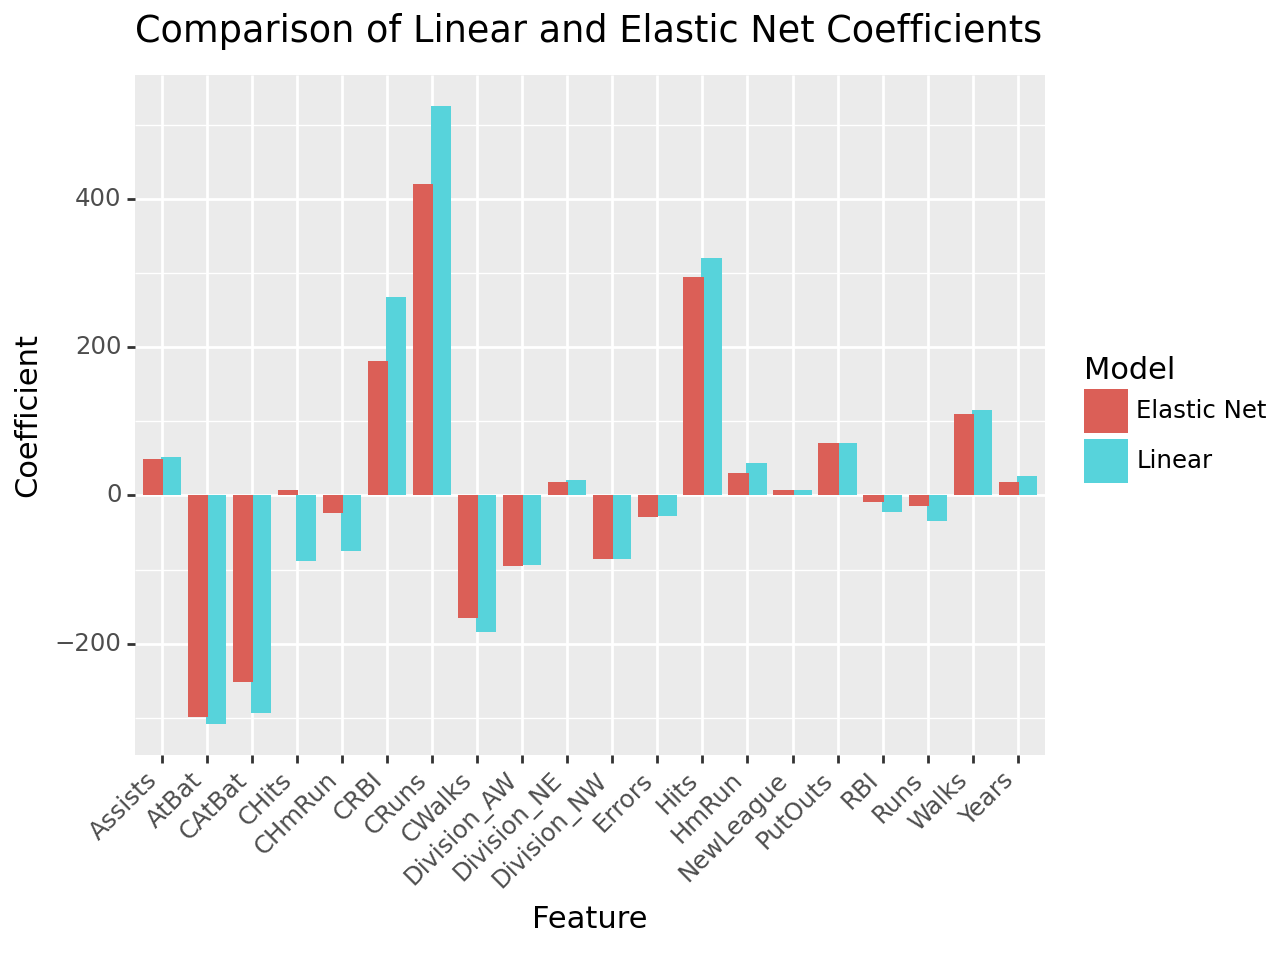

In [515]:
from plotnine import ggplot, aes, geom_bar, position_dodge, theme, labs, element_text

# Removing prefixes from feature names in coef_df
coef_df['Feature'] = coef_df['Feature'].str.replace('standardize__', '').str.replace('dummify__', '')

# Creating a pandas dataframe from the sorted_coefs list
sorted_coefs_df = pd.DataFrame(sorted_coefs, columns=['Feature', 'Coefficient'])
sorted_coefs_df['Model'] = 'Linear'
coef_df['Model'] = 'Elastic Net'

# Combining the dataframes
df_combined = pd.concat([sorted_coefs_df, coef_df])

# Plotting
plot = (ggplot(df_combined, aes(x='Feature', y='Coefficient', fill='Model')) +
        geom_bar(stat='identity', position=position_dodge(width=0.8)) +
        labs(title='Comparison of Linear and Elastic Net Coefficients',
             x='Feature',
             y='Coefficient') +
        theme(axis_text_x=element_text(rotation=45, hjust=1))
       )

print(plot)

*    The Elastic Net Model's coefficients are lower than the Linear Model's and are slightly less spread out. The CRuns coefficient for the Linear Model has the most influence on Salary and it's coefficient values are more erratic.
*    The coefficients for CHits was positive for the Elastic Net Model, but negative for the Linear Model.
*    The rest of the coefficients were matching in +/- sign.

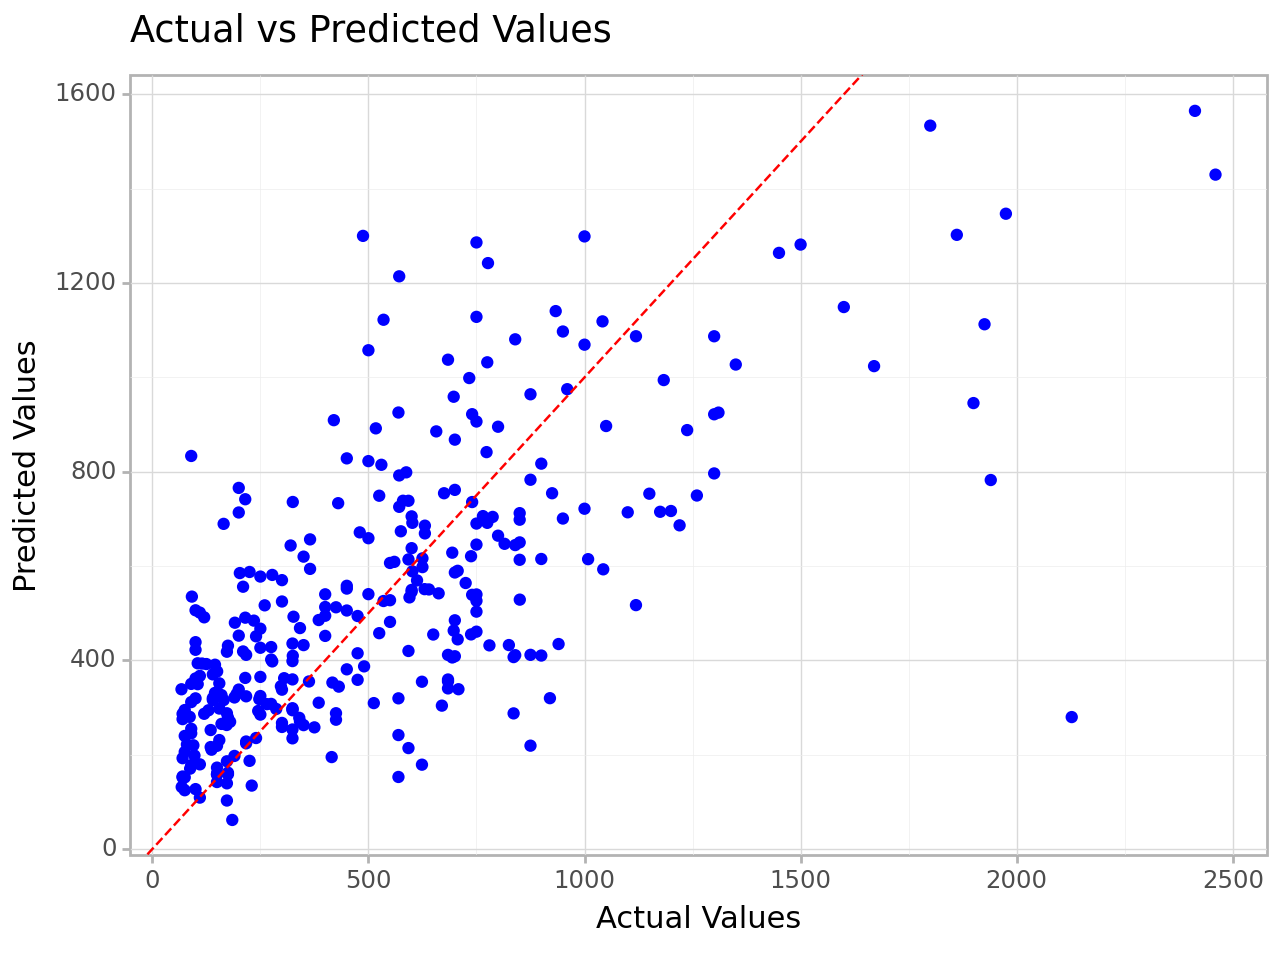

In [516]:
from plotnine import ggplot, aes, geom_point, geom_abline, labs, theme_light

# Creating a dataframe with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y,
    'Predicted': predictions
})

# Plotting the results
plot = (
    ggplot(results_df, aes(x='Actual', y='Predicted')) +
    geom_point(color='blue') +
    geom_abline(intercept=0, slope=1, color='red', linetype='dashed') +
    labs(x='Actual Values', y='Predicted Values', title='Actual vs Predicted Values') +
    theme_light()
)

print(plot)

*    Overall, the results look great, as our predicted values are close together with the actual values. There are some points that are further out, but they weren't considered to be outliers and they don't heavily influence the line of best fit.

# **Part V. Custom Model**

*    The final best pipeline from Part IV will be fitted on the original dataset with added variables.
*    The 7 new variables will be: batting average, career batting average, runs produced, career runs produced, on-base percentage, career on-base percentage, fielding percentage. Only the original dataset that was provided will be used.

Avg = Hits/AtBats, CAvg = CHits/CAtBats

RP = (CRuns + RBI)/2, CRP = (CRuns + CRBI)/2

Obp = (hits + walks)/AtBat, CObp = (CHits + CWalks)/CAtBat

FP = (PutOuts + Assists)/(PutOuts + Assists + Errors)

In [517]:
# Creating a new dataframe
df_hitters_plus = df_hitters.copy()

# Calculating the new variables
df_hitters_plus['Avg'] = (df_hitters_plus['Hits'] / df_hitters_plus['AtBat']).round(3)
df_hitters_plus['CAvg'] = (df_hitters_plus['CHits'] / df_hitters_plus['CAtBat']).round(3)
df_hitters_plus['RP'] = (df_hitters_plus['Runs'] + df_hitters_plus['RBI']) / 2
df_hitters_plus['CRP'] = (df_hitters_plus['CRuns'] + df_hitters_plus['CRBI']) / 2
df_hitters_plus['Obp'] = ((df_hitters_plus['Hits'] + df_hitters_plus['Walks']) / df_hitters_plus['AtBat']).round(3)
df_hitters_plus['CObp'] = ((df_hitters_plus['CHits'] + df_hitters_plus['CWalks']) / df_hitters_plus['CAtBat']).round(3)
df_hitters_plus['FP'] = ((df_hitters_plus['PutOuts'] + df_hitters_plus['Assists']) / (df_hitters_plus['PutOuts'] + df_hitters_plus['Assists'] + df_hitters_plus['Errors'])).round(3)

# Display the dataframe with the new columns
df_hitters_plus.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Errors,Salary,NewLeague,Avg,CAvg,RP,CRP,Obp,CObp,FP
0,293,66,1,30,29,14,1,293,66,1,...,20,149.65,0,0.225,0.225,29.5,29.5,0.273,0.273,0.960
1,315,81,7,24,38,39,14,3449,835,69,...,10,475.00,0,0.257,0.242,31.0,367.5,0.381,0.351,0.985
2,479,130,18,66,72,76,3,1624,457,63,...,14,480.00,0,0.271,0.281,69.0,245.0,0.430,0.443,0.986
3,496,141,20,65,78,37,11,5628,1575,225,...,3,500.00,0,0.284,0.280,71.5,833.0,0.359,0.343,0.986
4,321,87,10,39,42,30,2,396,101,12,...,4,91.50,0,0.271,0.255,40.5,47.0,0.364,0.338,0.995


In [518]:
# Checking for NA values
na_values = df_hitters_plus.isna().sum()

print(na_values[na_values > 0])

FP    15
dtype: int64


In [519]:
# Find rows where 'FP' column has NA values
na_rows = df_hitters_plus[df_hitters_plus['FP'].isna()]

# Display these rows
print(na_rows[['PutOuts', 'Assists', 'Errors']])

     PutOuts  Assists  Errors
9          0        0       0
38         0        0       0
52         0        0       0
65         0        0       0
125        0        0       0
132        0        0       0
149        0        0       0
158        0        0       0
186        0        0       0
196        0        0       0
198        0        0       0
207        0        0       0
249        0        0       0
251        0        0       0
267        0        0       0


In [520]:
# Converting NaN values for Fielding% to 0
df_hitters_plus['FP'].fillna(0, inplace=True)

In [521]:
# Checking for NA values again
na_values = df_hitters_plus.isna().sum()

print(na_values[na_values > 0])

Series([], dtype: int64)


In [522]:
df_hitters_plus

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Errors,Salary,NewLeague,Avg,CAvg,RP,CRP,Obp,CObp,FP
0,293,66,1,30,29,14,1,293,66,1,...,20,149.65,0,0.225,0.225,29.5,29.5,0.273,0.273,0.960
1,315,81,7,24,38,39,14,3449,835,69,...,10,475.00,0,0.257,0.242,31.0,367.5,0.381,0.351,0.985
2,479,130,18,66,72,76,3,1624,457,63,...,14,480.00,0,0.271,0.281,69.0,245.0,0.430,0.443,0.986
3,496,141,20,65,78,37,11,5628,1575,225,...,3,500.00,0,0.284,0.280,71.5,833.0,0.359,0.343,0.986
4,321,87,10,39,42,30,2,396,101,12,...,4,91.50,0,0.271,0.255,40.5,47.0,0.364,0.338,0.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,3,700.00,0,0.256,0.298,56.5,345.0,0.330,0.349,0.991
318,492,136,5,76,50,94,12,5511,1511,39,...,20,875.00,0,0.276,0.274,63.0,674.0,0.467,0.433,0.972
319,475,126,3,61,43,52,6,1700,433,7,...,7,385.00,0,0.265,0.255,52.0,155.0,0.375,0.341,0.955
320,573,144,9,85,60,78,8,3198,857,97,...,12,960.00,0,0.251,0.268,72.5,445.0,0.387,0.372,0.992


In [523]:
# Creating response and predictor variables from df_hitters_plus
X1 = df_hitters_plus.drop('Salary', axis=1)
y1 = df_hitters_plus['Salary']

**Linear Model: All Variables from the df_hitters_plus dataframe**

In [524]:
# Linear Regression pipeline
lr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("linear_regression", LinearRegression())]
)

# Performing cross-validation for R-squared
linear_r2_scores = cross_val_score(lr_pipeline, X1, y1, cv=5, scoring='r2')
print("Linear R-squared Scores:")
print(linear_r2_scores)
mean_r2 = np.mean(linear_r2_scores)
print(f"Mean R-squared: {mean_r2}\n")

# Performing cross-validation for MSE
linear_mse_scores = cross_val_score(lr_pipeline, X1, y1, cv=5, scoring='neg_mean_squared_error')
print("Linear MSE Scores:")
print(-(linear_mse_scores))
mean_mse = np.mean(-(linear_mse_scores))
print(f"Mean MSE: {mean_mse}\n")

# Fitting the model on the whole dataset
lr_pipeline.fit(X1, y1)

# Getting the coefficients
linear_coefs = lr_pipeline.named_steps['linear_regression'].coef_

# Extracting feature names
feature_names = (lr_pipeline.named_steps['preprocessing']
                 .transformers_[0][1]
                 .get_feature_names_out(input_features=X1.select_dtypes(include=[object]).columns.tolist())
                 .tolist() +
                 X1.select_dtypes(include=[np.number]).columns.tolist())

# Pairing coefficients with feature names
coefs_with_names = list(zip(feature_names, linear_coefs))

# Sorting the coefficients by their absolute values
sorted_coefs_plus = sorted(coefs_with_names, key=lambda x: abs(x[1]), reverse=True)

# Displaying the most significant coefficients
print("Most significant coefficients:")
for feature, coef in sorted_coefs_plus[:20]:
    print(f"{feature}: {coef}")

Linear R-squared Scores:
[-0.06089848  0.48968678  0.60767979  0.26407403  0.20957782]
Mean R-squared: 0.30202398805992325

Linear MSE Scores:
[103937.2457093  130849.63383576  81251.56451934 125116.60031834
 105461.08980643]
Mean MSE: 109323.22683783414

Most significant coefficients:
AtBat: -710.7251281874914
CHits: -650.6892016216178
Hits: 644.0889299443769
CRuns: 422.83041817559797
Walks: 304.1587708145679
CRP: 287.10581582623723
CWalks: -214.23535292141506
Obp: -201.80066534604083
CAtBat: 188.5874148510415
CRBI: 142.87975724281736
CAvg: 114.96397154261676
CHmRun: -91.7937903067142
Division_NW: -81.04808314233166
PutOuts: 60.443976108399426
Division_AW: -59.02198611368764
Runs: -58.40709917654459
Years: 46.68081784368742
Assists: 45.049548127064995
HmRun: 44.53704369478858
Avg: -38.583128055064634


*    The Linear Model was fitted onto the new df_hitters_plus dataset with 7 new metrics. It had an MSE of 109323.23, the lowest so far, and an R2 score of 0.30.
*    Adding more complexity to the model did not improve the R2 score or lower the MSE.
*    It's worth noting that the newly created variable of career runs produced was 6th as well as 1986 on-base percentage at 8th.
*    Of the 7 new variables created, only 2 were in the top 10.

**Elastic Net Model: All Variables from the df_hitters_plus dataframe**

In [525]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Elastic Net Regression pipeline
en_pipeline = Pipeline(
    [("preprocessing", ct),
     ("elastic_net_regression", ElasticNet(alpha=1, l1_ratio=0.99))]
)

# Performing cross-validation for R-squared
elastic_net_r2_scores = cross_val_score(en_pipeline, X1, y1, cv=5, scoring='r2')
print("Elastic Net R-squared Scores:")
print(elastic_net_r2_scores)
mean_r2 = np.mean(elastic_net_r2_scores)
print(f"Mean R-squared: {mean_r2}\n")

# Performing cross-validation for MSE
elastic_net_mse_scores = cross_val_score(en_pipeline, X1, y1, cv=5, scoring='neg_mean_squared_error')
print("Elastic Net MSE Scores:")
print(-(elastic_net_mse_scores))
mean_mse = np.mean(-(elastic_net_mse_scores))
print(f"Mean MSE: {mean_mse}\n")

# Fitting the model on the whole dataset
en_pipeline.fit(X1, y1)

# Accessing the ElasticNet model from the pipeline
elastic_net_model = en_pipeline.named_steps['elastic_net_regression']

# Getting the coefficients from the ElasticNet model
elastic_net_coefs = elastic_net_model.coef_

# Extracting feature names
feature_names = (en_pipeline.named_steps['preprocessing']
                 .transformers_[0][1]
                 .get_feature_names_out(input_features=X1.select_dtypes(include=[object]).columns.tolist())
                 .tolist() +
                 X1.select_dtypes(include=[np.number]).columns.tolist())

# Pairing coefficients with feature names
coefs_with_names = list(zip(feature_names, elastic_net_coefs))

# Sorting the coefficients by their absolute values
sorted_coefs_en = sorted(coefs_with_names, key=lambda x: abs(x[1]), reverse=True)

# Displaying the most significant coefficients
print("Most significant coefficients:")
for feature, coef in sorted_coefs_en[:20]:
    print(f"{feature}: {coef}")

Elastic Net R-squared Scores:
[0.1658296  0.47777911 0.59988039 0.16882932 0.40422   ]
Mean R-squared: 0.3633076838715344

Elastic Net MSE Scores:
[ 81724.47709771 133902.88292219  82866.8624294  141309.39065357
  79491.20060453]
Mean MSE: 103858.96274147973

Most significant coefficients:
AtBat: -345.43912484983827
Hits: 250.35566133987032
Walks: 194.81417888501323
Obp: -122.75020639673977
CAvg: 115.29038208342958
CRuns: 101.66681877333765
Division_NW: -81.75639663729781
CWalks: -72.75050188318508
Division_AW: -72.07787744022336
CRP: 62.81735704561568
PutOuts: 56.797624465476524
CHmRun: 45.71269593351753
Assists: 35.757899974169426
Avg: -27.7004140034816
Errors: -24.449602839329078
RP: 21.83579324578034
CRBI: 20.89391585108134
FP: 20.480169407509653
RBI: 19.327202565275286
Runs: 12.329104760040025


*    The Elastic Net Model, tuned with the best pipeline from part 4, was fitted onto the new df_hitters_plus dataset with 7 new metrics. It had an MSE of 103858.96 and an R2 score of 0.36. These metrics were better than the Linear Model by a considerable margin.
*    It's worth noting that the newly created variable of on-base percentage was 4th as well as career batting average at 5th. Career runs produced was 10th and 1986 batting average was 14th. 1986 runs produced was 16th, fielding percentage was 18th. Creating a new metric for defense proved to not be significant, and the other defensive statistics were outside of the top 10 as well.
*    Of the 7 new variables created, only 2 were in the top 5 and 4 were in the top 15 of significant coefficients.

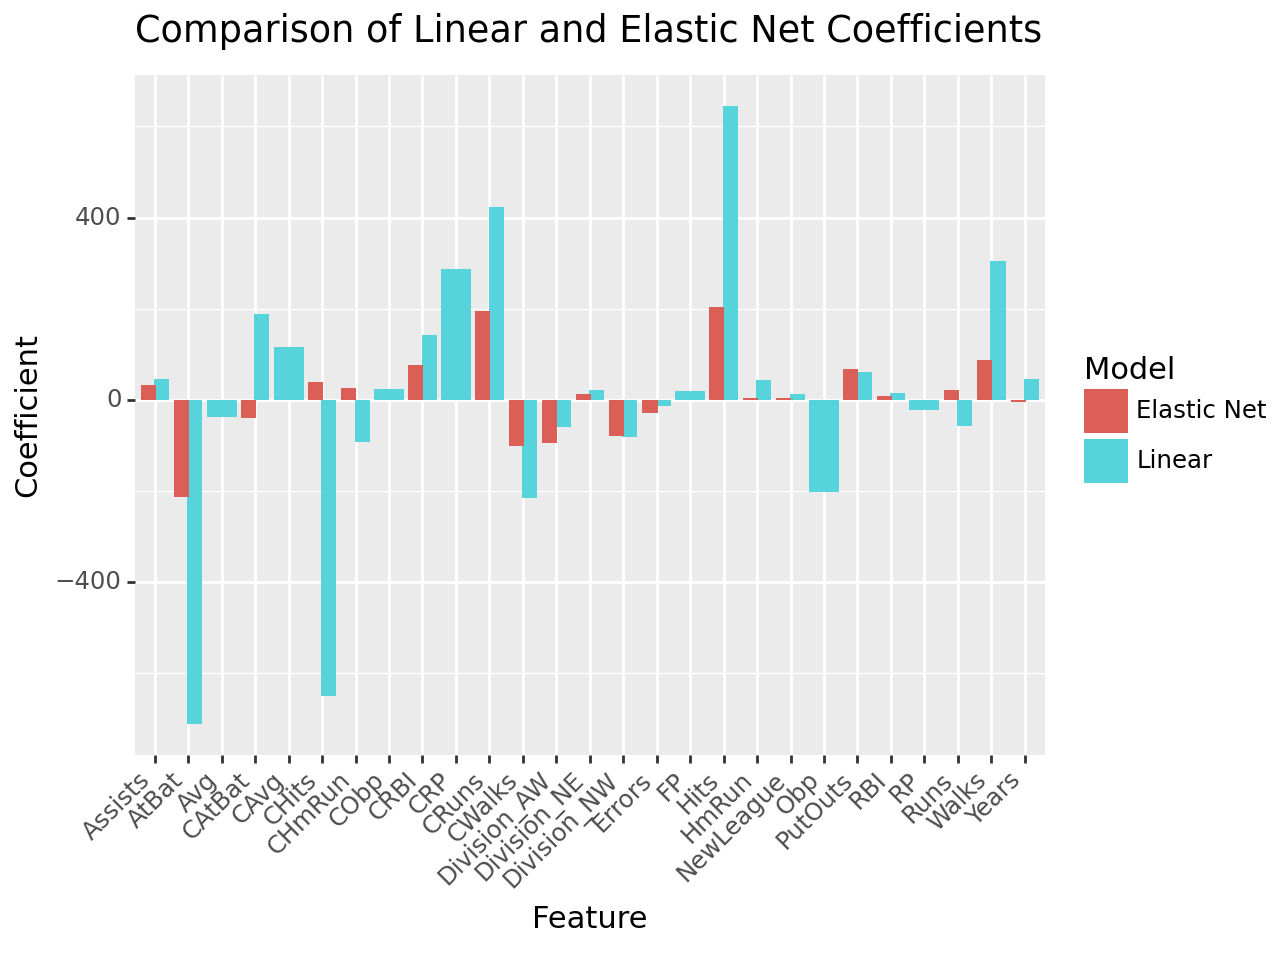

In [526]:
from plotnine import ggplot, aes, geom_bar, position_dodge, theme, labs, element_text

# Removing prefixes from feature names in coef_df
coef_df_plus['Feature'] = coef_df_plus['Feature'].str.replace('standardize__', '').str.replace('dummify__', '')

# Creating a pandas dataframe from the sorted_coefs list
sorted_coefs_df = pd.DataFrame(sorted_coefs_plus, columns=['Feature', 'Coefficient'])
sorted_coefs_df['Model'] = 'Linear'
coef_df_plus['Model'] = 'Elastic Net'

# Combining the dataframes
df_combined = pd.concat([sorted_coefs_df, coef_df_plus])

# Plotting
plot = (ggplot(df_combined, aes(x='Feature', y='Coefficient', fill='Model')) +
        geom_bar(stat='identity', position=position_dodge(width=0.8)) +
        labs(title='Comparison of Linear and Elastic Net Coefficients',
             x='Feature',
             y='Coefficient') +
        theme(axis_text_x=element_text(rotation=45, hjust=1))
       )

print(plot)

*    The Linear Model's coefficients are much higher than the Elastic Net Model's, and the Elastic Net Model's coefficients are closer to 0 than the Linear Model. The Linear Model's coefficients have a lot more variability than the Elastic Net Model.
*    The CAtBat, CHmRun, CObp, RP, and Runs coefficients have different have their positive and negative signs different from each other for the Elastic Net and Linear Models. It's interesting to see that CAtBat has a stronger positive value than the Elastic Net's negative coefficient value.
*    CHits was weighted heavily in the Linear Model, but very close to 0 in the Elastic Net Model.

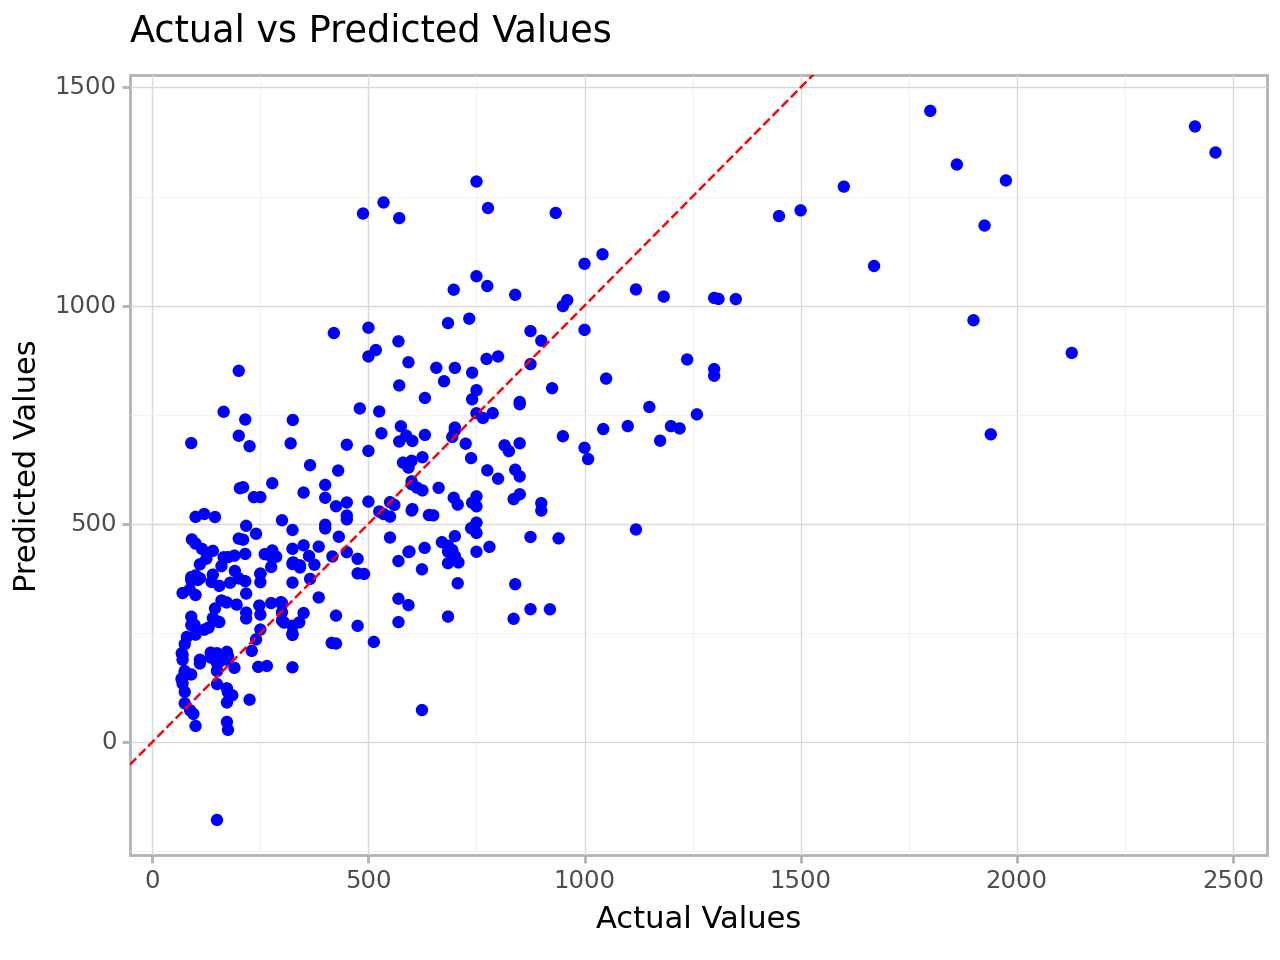

In [527]:
from plotnine import ggplot, aes, geom_point, geom_abline, labs, theme_light

# Creating a dataframe with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y,
    'Predicted': predictions1
})

# Plotting the results
plot = (
    ggplot(results_df, aes(x='Actual', y='Predicted')) +
    geom_point(color='blue') +
    geom_abline(intercept=0, slope=1, color='red', linetype='dashed') +
    labs(x='Actual Values', y='Predicted Values', title='Actual vs Predicted Values') +
    theme_light()
)

print(plot)

*    The Actual and Predicted values are close together around the line of best fit, and that's a good sign that the model is performing well.